## 重新考察CNN
对图像分类任务来说：特征抽取就是在编码，最后的分类器就是解码器
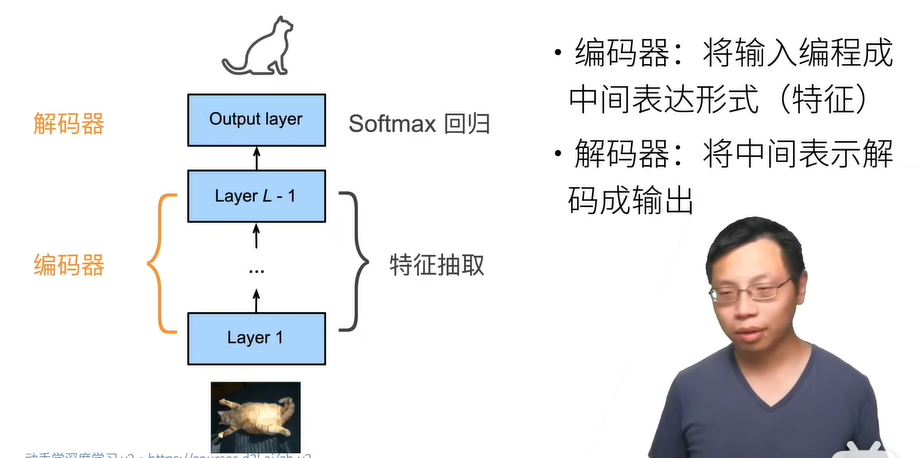

## 重新考察RNN
迭代隐状态的过程可以看作是编码的过程，最终的分类器相当于解码器
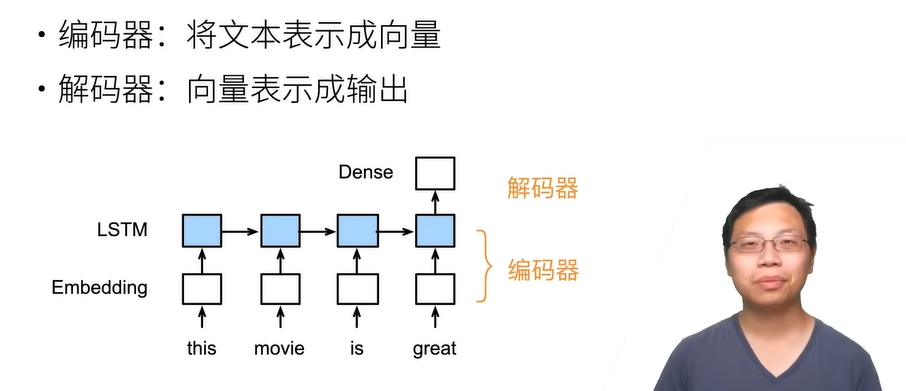

## 编码器-译码器架构
在该架构中，编码器将输入表示成机器容易学习的状态，解码器负责输出我们想要的形式
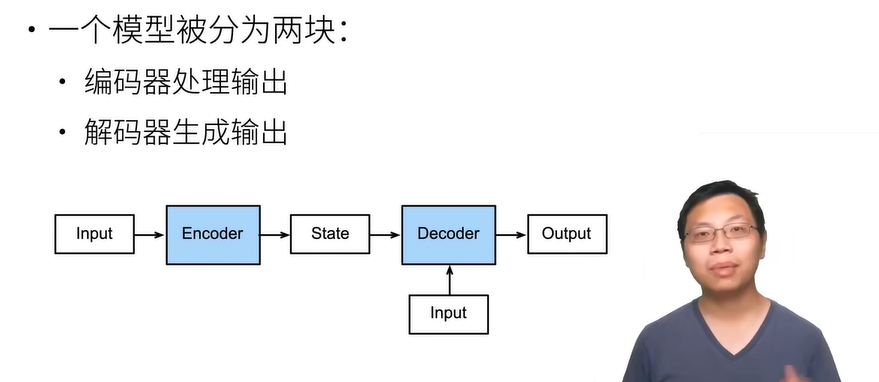

机器翻译是序列转换模型的一个核心问题， 其输入和输出都是长度可变的序列。 为了处理这种类型的输入和输出， 我们可以设计一个包含两个主要组件的架构： 第一个组件是一个编码器（encoder）： 它接受一个长度可变的序列作为输入， 并将其转换为具有固定形状的编码状态。 第二个组件是解码器（decoder）： 它将固定形状的编码状态映射到长度可变的序列。 

由于“编码器－解码器”架构是形成后续章节中不同序列转换模型的基础， 因此本节将把这个架构转换为接口方便后面的代码实现。

## 编码器

In [1]:
from torch import nn

class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        """将输入的长度可变的序列转换成固定形状的编码状态"""
        raise NotImplementedError

## 解码器

In [2]:
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        # 将‘编码器的输出’转换为‘编码后的状态’。 
        # ps:此步骤可能需要额外的输入，例如：输入序列的有效长度
        raise NotImplementedError

    def forward(self, X, state):
        # 接收‘编码后的状态’与额外的输入，计算输出
        raise NotImplementedError

## 合并编码器与解码器

In [3]:
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        # 将编码器的输出转换为编码后的状态
        dec_state = self.decoder.init_state(enc_outputs, *args)
        # 根据解码器的输入以及编码后的状态计算输出
        return self.decoder(dec_X, dec_state)

“编码器－解码器”体系架构中的术语状态 会启发人们使用具有状态的神经网络来实现该架构。